In [12]:
import mne
import numpy as np

In [13]:
raw = mne.io.read_raw("files/sess02_subj02_EEG_Artifact-EEG_Artifact-raw.fif", preload=True).pick(["O1", "O2", "Fp1", "Fp2"])
raw.filter(1, 40, fir_design='firwin')
raw.resample(256)

events, ev_id = mne.events_from_annotations(raw, event_id={'eyemovement_blinking': 1}, verbose=None)

In [14]:
def update(events):
    t = 2
    initial = events[-1][0]

    new_initial = int(initial + t*256)

    events = np.append(events, [[new_initial, 0, 1]], axis=0)

    return events

In [15]:
for i in range(6):
    events = update(events)

In [16]:
events

array([[5118,    0,    1],
       [5630,    0,    1],
       [6142,    0,    1],
       [6654,    0,    1],
       [7166,    0,    1],
       [7678,    0,    1],
       [8190,    0,    1]])

In [17]:
event_id = {'eyemovement_blinking': 1}
tmin = 0
tmax = 2

In [18]:
noisy_avg = mne.Epochs(raw, events, event_id, tmin, tmax, proj=False,
                           picks="eeg", baseline=None, preload=True,
                           verbose=False).average()

In [19]:
from utils.processing import Processing
get = Processing(raw=raw, mode="BILSTM")

1/1 [==============================] - 0s 126ms/step


In [20]:
clean_raw = get.reconstructed

# Create an average using the cleaned data
clean_avg = mne.Epochs(clean_raw, events, event_id, tmin, tmax, proj=False,
                           picks="eeg", baseline=None, preload=True,
                           verbose=False).average()

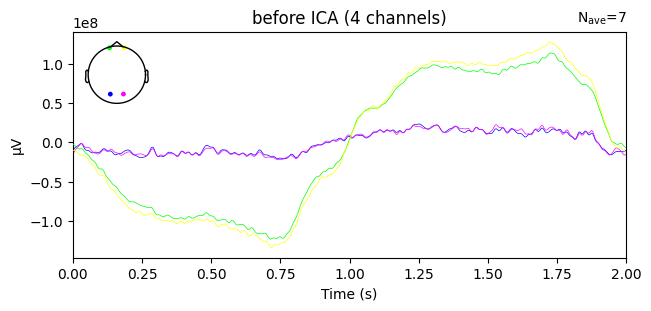

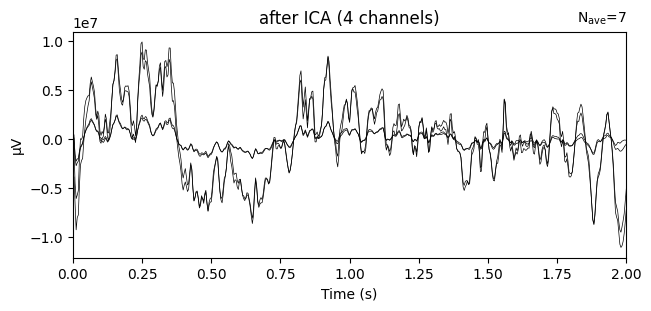

In [21]:
noisy_avg.plot(spatial_colors=True,
               titles="before ICA")

clean_avg.plot(spatial_colors=True,
               titles="after ICA");